# 1. Import the Libraries 

In [1]:
#Importing important libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers



Using TensorFlow backend.


# 2. Load the data

In [2]:
#Open the file as readonly
data1=h5py.File("SVHN_single_grey1.h5",'r')

In [3]:
data1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
#Load the training, testing, and validation data
X_train=data1['X_train']
X_test=data1['X_test']
X_val=data1['X_val']
y_train=data1['y_train']
y_test=data1['y_test']
y_val=data1['y_val']

In [5]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


#### Visualizing the dataset

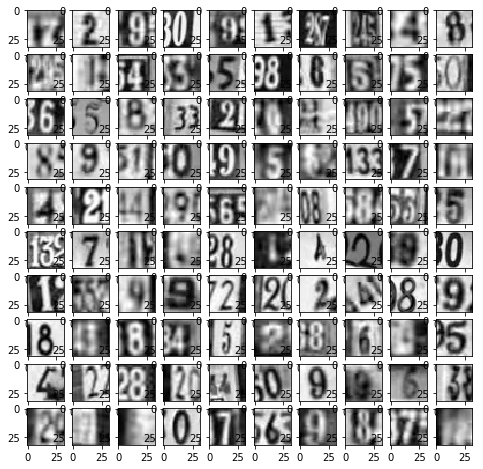

In [6]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

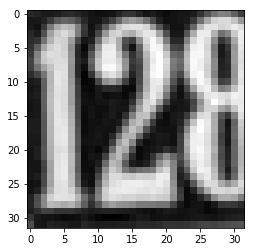

Label:  2


In [7]:
# show the number in the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

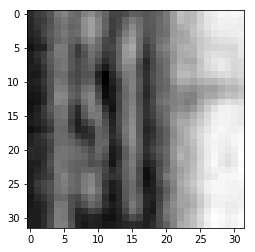

Label:  1


In [8]:
# show the number in the dataset
plt.imshow(X_test[0],cmap='gray')    
plt.show()
print('Label: ', y_test[0])

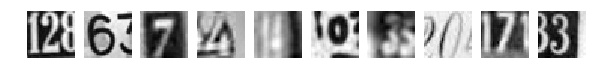

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

# 3. Implementing an optimal K-Nearest Neighbour Classifier

In [10]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [11]:
# Initializing the value of k and finding the accuracies on validation data
k_vals = range(1, 30, 2)
accuracies = []

for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score = knn.score(X_val, y_val)
  print("k value=%d, accuracy score=%.2f%%" % (k, score * 100))
  accuracies.append(score)
 
# finding the value of k which has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d value has highest accuracy of %.2f%% on validation data" % (k_vals[i],accuracies[i] * 100))

k value=1, accuracy score=83.78%
k value=3, accuracy score=62.83%
k value=5, accuracy score=62.42%
k value=7, accuracy score=61.43%
k value=9, accuracy score=60.59%
k value=11, accuracy score=60.32%
k value=13, accuracy score=59.88%
k value=15, accuracy score=59.45%
k value=17, accuracy score=59.25%
k value=19, accuracy score=59.10%
k value=21, accuracy score=58.77%
k value=23, accuracy score=58.62%
k value=25, accuracy score=58.41%
k value=27, accuracy score=58.21%
k value=29, accuracy score=58.18%
k=1 value has highest accuracy of 83.78% on validation data


In [12]:
# Retraining the model using the best k value and predict the labels on test data

knn = KNeighborsClassifier(n_neighbors=k_vals[i])
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

 # 4. Printing Classification Metric Report

In [13]:
# show a final classification report demonstrating the accuracy of the classifier
print("EVALUATION ON TESTING DATA")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  229   82   80  149  121]
 [  85  195   51   71 1039   55  111   35   98   72]
 [  94  103   71  220   54  588  203   48  205  182]
 [ 225   74   51   72  102  154  711   33  295  115]
 [  65  173  146  100   34   38   48 1071   53   80]
 [ 150   62   59  130   86  153  267   44  675  186]
 [ 238   87   89  115   60  113  115   65  192  730]]
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
         

* The accuracy of the model is 46%.That is not good. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy.

#### Predicting the digits using KNN Classifier

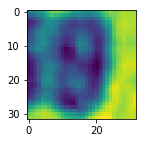

[9]


In [14]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(32,32))
plt.show()
image = X_test[15]
print(knn.predict(image.reshape(1, -1)))

# 5. Implementing Deep Neural Network

In [15]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

#### Converting output label to multiple values

In [16]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [17]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [18]:
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [19]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## Implementing Neural Network 

In [20]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [21]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [22]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

#### Using sgd optimizer  and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [23]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 125us/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 5s 116us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 5s 112us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 5s 115us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 5s 128us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 6s 145us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 6s 146us/step - loss: nan - accuracy: 0.

#### Using adam optimizer  and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [25]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 203us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 8s 198us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 9s 204us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 8s 187us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 9s 209us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 9s 215us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 9s 214us/step - loss: nan - accuracy: 0.

* The accuracy of the model on val data is very low either using adam or sgd.

#### Now, try to change the learning rate in SGD optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [27]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 7s 157us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 7s 163us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 7s 164us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 7s 162us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/100
42000/42000 [==============================] - 6s 139us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/100
42000/42000 [==============================] - 6s 152us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/100
42000/42000 [==============================] - 7s 158us/step - loss: nan - accur

42000/42000 [==============================] - 7s 157us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 58/100
42000/42000 [==============================] - 7s 158us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 59/100
42000/42000 [==============================] - 6s 154us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 60/100
42000/42000 [==============================] - 6s 154us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 61/100
42000/42000 [==============================] - 7s 160us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 62/100
42000/42000 [==============================] - 7s 156us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 63/100
42000/42000 [==============================] - 7s 155us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch

* The accuracy of the model on val data using sgd with learning rate=0.0001 is improving a bit but not much.

#### Now, let's try to change the learning rate in ADAM optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [28]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 9s 210us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 9s 206us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 9s 210us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 8s 196us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/100
42000/42000 [==============================] - 9s 210us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/100
42000/42000 [==============================] - 9s 211us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/100
42000/42000 [==============================] - 9s 210us/step - loss: nan - accur

42000/42000 [==============================] - 9s 225us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 58/100
42000/42000 [==============================] - 9s 217us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 59/100
42000/42000 [==============================] - 9s 207us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 60/100
42000/42000 [==============================] - 9s 211us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 61/100
42000/42000 [==============================] - 9s 207us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 62/100
42000/42000 [==============================] - 9s 206us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 63/100
42000/42000 [==============================] - 9s 208us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch

* The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.

In [29]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

60000/60000 [==============================] - 6s 108us/step
Val_acc using simple NN adam :  0.10000000149011612


In [30]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.1


## Implementing batch normalization for training the neural network 

In [31]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

#### Adding Batch normalization layer 

In [32]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [33]:
keras_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

#### Using ADAM optimizer.
* learning rate= 0.0001


In [34]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 13s 306us/step - loss: 2.1503 - accuracy: 0.2509 - val_loss: 2.0331 - val_accuracy: 0.3029
Epoch 2/100
42000/42000 [==============================] - 11s 261us/step - loss: 1.6053 - accuracy: 0.5115 - val_loss: 1.6526 - val_accuracy: 0.4892
Epoch 3/100
42000/42000 [==============================] - 10s 234us/step - loss: 1.3079 - accuracy: 0.6344 - val_loss: 1.3942 - val_accuracy: 0.5811
Epoch 4/100
42000/42000 [==============================] - 11s 252us/step - loss: 1.1140 - accuracy: 0.6932 - val_loss: 1.2044 - val_accuracy: 0.6502
Epoch 5/100
42000/42000 [==============================] - 11s 271us/step - loss: 0.9745 - accuracy: 0.7301 - val_loss: 1.1594 - val_accuracy: 0.6657
Epoch 6/100
42000/42000 [==============================] - 11s 267us/step - loss: 0.8699 - accuracy: 0.7566 - val_loss: 1.0416 - val_accuracy: 0.6866
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 12s 283us/step - loss: 0.0920 - accuracy: 0.9733 - val_loss: 0.6723 - val_accuracy: 0.8118
Epoch 56/100
42000/42000 [==============================] - 12s 276us/step - loss: 0.0848 - accuracy: 0.9754 - val_loss: 0.5955 - val_accuracy: 0.8358
Epoch 57/100
42000/42000 [==============================] - 12s 276us/step - loss: 0.0809 - accuracy: 0.9767 - val_loss: 1.2275 - val_accuracy: 0.7210
Epoch 58/100
42000/42000 [==============================] - 12s 275us/step - loss: 0.0881 - accuracy: 0.9742 - val_loss: 0.6060 - val_accuracy: 0.8335
Epoch 59/100
42000/42000 [==============================] - 11s 273us/step - loss: 0.0794 - accuracy: 0.9780 - val_loss: 0.6365 - val_accuracy: 0.8275
Epoch 60/100
42000/42000 [==============================] - 12s 290us/step - loss: 0.0770 - accuracy: 0.9775 - val_loss: 0.5977 - val_accuracy: 0.8428
Epoch 61/100
42000/42000 [==============================] - 12s 276us/step - loss: 0.0707 - ac

In [36]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

60000/60000 [==============================] - 7s 114us/step
Val_acc using Batch ANN adam :  0.8522833585739136


In [37]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.100000
2,NN_Batch_adam,0.852283


## Implementing (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [38]:
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

#### Adding Batch normalization layer  

In [39]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [40]:
keras_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

#### Using SGD optimizer
* learning rate =0.0001


In [41]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
# Fitting the ANN to the Training data
history_2 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 13s 301us/step - loss: 2.1559 - accuracy: 0.2432 - val_loss: 2.0340 - val_accuracy: 0.2805
Epoch 2/100
42000/42000 [==============================] - 11s 262us/step - loss: 1.6122 - accuracy: 0.5026 - val_loss: 1.6079 - val_accuracy: 0.4790
Epoch 3/100
42000/42000 [==============================] - 11s 264us/step - loss: 1.3153 - accuracy: 0.6259 - val_loss: 1.3647 - val_accuracy: 0.5996
Epoch 4/100
42000/42000 [==============================] - 10s 244us/step - loss: 1.1243 - accuracy: 0.6873 - val_loss: 1.2534 - val_accuracy: 0.6269
Epoch 5/100
42000/42000 [==============================] - 10s 247us/step - loss: 0.9865 - accuracy: 0.7253 - val_loss: 1.1546 - val_accuracy: 0.6611
Epoch 6/100
42000/42000 [==============================] - 11s 261us/step - loss: 0.8828 - accuracy: 0.7519 - val_loss: 1.0069 - val_accuracy: 0.6991
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 11s 266us/step - loss: 0.0925 - accuracy: 0.9740 - val_loss: 0.7779 - val_accuracy: 0.7872
Epoch 56/100
42000/42000 [==============================] - 11s 260us/step - loss: 0.0876 - accuracy: 0.9746 - val_loss: 0.7655 - val_accuracy: 0.8039
Epoch 57/100
42000/42000 [==============================] - 11s 260us/step - loss: 0.0796 - accuracy: 0.9777 - val_loss: 0.9190 - val_accuracy: 0.7777
Epoch 58/100
42000/42000 [==============================] - 11s 263us/step - loss: 0.0811 - accuracy: 0.9770 - val_loss: 0.7605 - val_accuracy: 0.8059
Epoch 59/100
42000/42000 [==============================] - 12s 276us/step - loss: 0.0838 - accuracy: 0.9752 - val_loss: 0.6522 - val_accuracy: 0.8274
Epoch 60/100
42000/42000 [==============================] - 11s 263us/step - loss: 0.0825 - accuracy: 0.9762 - val_loss: 0.8040 - val_accuracy: 0.7952
Epoch 61/100
42000/42000 [==============================] - 11s 257us/step - loss: 0.0812 - ac

In [43]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using BatchNorm sgd : ', results_2[1])

60000/60000 [==============================] - 6s 107us/step
Val_acc using BatchNorm sgd :  0.8321499824523926


In [44]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.100000
2,NN_Batch_adam,0.852283
3,NN_Batch_sgd,0.832150


* The batch normalization using SGD optimizer is giving better results than using adam optimizer.

## Implementing batch normalization and Dropout for training the neural network 

In [45]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

#### Adding BatchNormalization Layer and Dropout Layer (0.5)

In [46]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [47]:
keras_model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)              

#### Using ADAM optimizer.
* learning rate= 0.0001

In [48]:
#Setting the learning rate in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
# Fitting the ANN to the Training data
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 13s 317us/step - loss: 2.8801 - accuracy: 0.1010 - val_loss: 2.3211 - val_accuracy: 0.1155
Epoch 2/100
42000/42000 [==============================] - 11s 272us/step - loss: 2.7449 - accuracy: 0.1028 - val_loss: 2.3075 - val_accuracy: 0.1058
Epoch 3/100
42000/42000 [==============================] - 11s 267us/step - loss: 2.6439 - accuracy: 0.1048 - val_loss: 2.3014 - val_accuracy: 0.1115
Epoch 4/100
42000/42000 [==============================] - 10s 244us/step - loss: 2.5780 - accuracy: 0.1039 - val_loss: 2.2979 - val_accuracy: 0.1156
Epoch 5/100
42000/42000 [==============================] - 10s 242us/step - loss: 2.5229 - accuracy: 0.1044 - val_loss: 2.2954 - val_accuracy: 0.1187
Epoch 6/100
42000/42000 [==============================] - 11s 266us/step - loss: 2.4878 - accuracy: 0.1030 - val_loss: 2.2919 - val_accuracy: 0.1283
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 11s 264us/step - loss: 1.4796 - accuracy: 0.4490 - val_loss: 1.2452 - val_accuracy: 0.5684
Epoch 56/100
42000/42000 [==============================] - 12s 274us/step - loss: 1.4744 - accuracy: 0.4541 - val_loss: 1.3108 - val_accuracy: 0.5528
Epoch 57/100
42000/42000 [==============================] - 11s 266us/step - loss: 1.4592 - accuracy: 0.4598 - val_loss: 1.2248 - val_accuracy: 0.5864
Epoch 58/100
42000/42000 [==============================] - 11s 263us/step - loss: 1.4623 - accuracy: 0.4556 - val_loss: 1.2856 - val_accuracy: 0.5605
Epoch 59/100
42000/42000 [==============================] - 11s 264us/step - loss: 1.4466 - accuracy: 0.4644 - val_loss: 1.2281 - val_accuracy: 0.5913
Epoch 60/100
42000/42000 [==============================] - 11s 271us/step - loss: 1.4387 - accuracy: 0.4665 - val_loss: 1.1960 - val_accuracy: 0.5940
Epoch 61/100
42000/42000 [==============================] - 11s 267us/step - loss: 1.4267 - ac

In [50]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_3[1])

60000/60000 [==============================] - 6s 108us/step
Val_acc using BatchNorm and Dropout adam :  0.7188666462898254


In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.100000
2,NN_Batch_adam,0.852283
3,NN_Batch_sgd,0.832150
4,NN_Batch_Drop_adam,0.718867


## Testing NN on test data 

In [52]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [53]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Activation('softmax'))

In [54]:
keras_model_final.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

In [55]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 11s 250us/step - loss: 2.1210 - accuracy: 0.2589 - val_loss: 1.9664 - val_accuracy: 0.3078
Epoch 2/100
42000/42000 [==============================] - 9s 209us/step - loss: 1.5681 - accuracy: 0.5217 - val_loss: 1.5648 - val_accuracy: 0.5132
Epoch 3/100
42000/42000 [==============================] - 9s 210us/step - loss: 1.2810 - accuracy: 0.6406 - val_loss: 1.3372 - val_accuracy: 0.6101
Epoch 4/100
42000/42000 [==============================] - 9s 210us/step - loss: 1.0970 - accuracy: 0.7001 - val_loss: 1.2429 - val_accuracy: 0.6312
Epoch 5/100
42000/42000 [==============================] - 9s 205us/step - loss: 0.9619 - accuracy: 0.7343 - val_loss: 1.0949 - val_accuracy: 0.6870
Epoch 6/100
42000/42000 [==============================] - 8s 184us/step - loss: 0.8599 - accuracy: 0.7594 - val_loss: 1.1515 - val_accuracy: 0.6505
Epoch 7/100
42000/42000 [==============================

42000/42000 [==============================] - 9s 209us/step - loss: 0.0892 - accuracy: 0.9741 - val_loss: 1.0952 - val_accuracy: 0.7479
Epoch 56/100
42000/42000 [==============================] - 9s 213us/step - loss: 0.0887 - accuracy: 0.9735 - val_loss: 1.0761 - val_accuracy: 0.7474
Epoch 57/100
42000/42000 [==============================] - 9s 209us/step - loss: 0.0845 - accuracy: 0.9755 - val_loss: 1.1170 - val_accuracy: 0.7328
Epoch 58/100
42000/42000 [==============================] - 9s 209us/step - loss: 0.0908 - accuracy: 0.9736 - val_loss: 1.2421 - val_accuracy: 0.7148
Epoch 59/100
42000/42000 [==============================] - 9s 208us/step - loss: 0.0810 - accuracy: 0.9764 - val_loss: 1.1263 - val_accuracy: 0.7456
Epoch 60/100
42000/42000 [==============================] - 9s 209us/step - loss: 0.0758 - accuracy: 0.9784 - val_loss: 1.1245 - val_accuracy: 0.7408
Epoch 61/100
42000/42000 [==============================] - 9s 207us/step - loss: 0.0782 - accuracy: 0.9777 - val

In [57]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

18000/18000 [==============================] - 2s 112us/step
Test accuracy :  0.7328888773918152


#### Predicting the digits using NN classifier on test data

#### Image 1

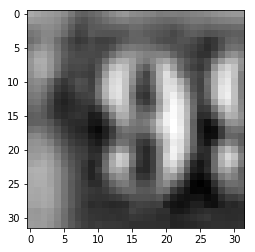

In [58]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [59]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[5]

9

#### Image 2

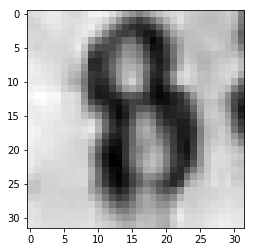

In [60]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray')

In [61]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[10]

8

#### Image 3

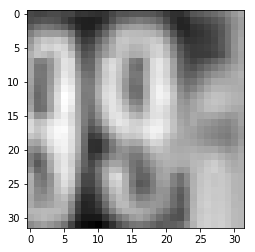

In [62]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')

In [63]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[112]

9

In [64]:
#Predicting for all images
y_pred=keras_model_final.predict_classes(X_test)
print(y_pred)

[8 7 2 ... 7 9 2]


# Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics 

* KNN requires more time to find the nearest neibhours. It takes less time to train the model. It took more than 24hrs to find the best neighbour(k). However, Neural Network takes more time to train the model.
* In KNN, we have only one hyperparameter k while in NN we have so many hyperparameters(Hidden Layers, Hidden Units,learning Rate, Number of Epochs, activations Functions).
* KNN classification metrics shows that the accuracy is 46%. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy. the other digits are not predicted correclty.
* Using NN with batchNormalization we got 74.7% accuracy. We have predicted the classification of the images correctly.